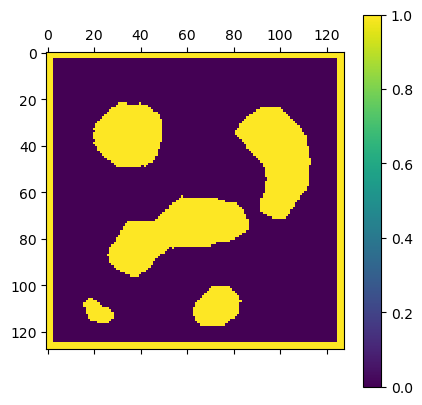

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

#Input Variables
image_map = "./data/map0.png"
start_pos = (10,10)
goal_pos = (90,70)

# Load grid map
image = Image.open(image_map).convert('L')
grid_map = np.array(image.getdata()).reshape(image.size[0],image.size[1])/255
# binarize the image
grid_map[grid_map > 0.5] = 1
grid_map[grid_map <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map = (grid_map * -1) + 1
# Show grid map
plt.matshow(grid_map)
plt.colorbar()
plt.show()

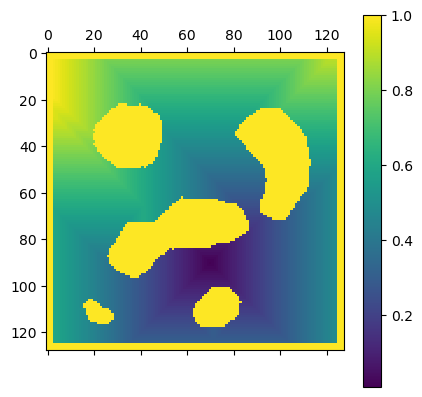

In [15]:
#Wavefront Planner

#Function for checking the validity of the point index

def isValid(point_index, map):
    """
    Checks the validity of point_index in the map.
    Returns False if:
    (1) the point is out of the map, indicated by either a negative index number or an index number greater than or equal to the map's size, or
    (2) the point is an obstacle, indicated by 1 in the value
    Otherwise, returns True.
    """

    # Check if the point is out of the map bounds
    if point_index[0] < 0 or point_index[1] < 0 or point_index[0] >= map.shape[0] or point_index[1] >= map.shape[1]:
      return False

    # Check if the point is an obstacle
    if map[point_index[0]][point_index[1]] == 1:
        return False

    # If neither condition is met, the point is valid
    return True

# Programming Attraction Function Using wavefront planner Algorithm

def wavefront_planner_connect_8(map, goal):


  "Wavefront Algorithm with 8-point connectivity"

  # Define the motion
  motions = [(0,-1),(0,1),(-1,0),(1,0),(-1,-1),(-1,1),(1,-1),(1,1)]

  #Referance value to update the grid map
  value = 2

  # Goal position as 2
  map[goal] = value
  queue = [goal]

  # Queue is not Empty
  while len(queue) !=0:

    #Increment the previous value by 1
    value +=1
    new_queue = []

    for p in queue:
      for m in motions:

        # Initialize a list to store the new point index
        new_points = []

        # Calculate the new point index component-wise
        for i in range(len(p)):
            new_component = p[i] + m[i]
            new_points.append(new_component)

        # Check the validity of the point index and update the value if valid
        if isValid(new_points, map) and map[new_points[0]][new_points[1]] == 0:
            map[new_points[0]][new_points[1]] = value
            new_queue.append(new_points)



    #Update the queue
    queue = new_queue

  return map

# Run the Attraction function
wfp = wavefront_planner_connect_8(grid_map.copy(),goal_pos)

# Performing Normalization to change the scale in the range of [0,1]

min_val = np.min(wfp)
max_val = np.max(wfp)

wfp [wfp == 1] = max_val + 1 # Change the obstacle to the maximum value

wfp_normalized = (wfp - min_val) / (max_val)

# plot the new grid map
plt.matshow(wfp_normalized)
plt.colorbar()
plt.show()

Minimum Path: [(10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 30), (10, 31), (10, 32), (11, 33), (12, 34), (13, 35), (14, 36), (15, 37), (16, 38), (17, 39), (18, 40), (19, 41), (20, 42), (21, 43), (22, 44), (23, 45), (24, 46), (25, 47), (26, 48), (27, 49), (28, 49), (29, 50), (30, 50), (31, 50), (32, 50), (33, 50), (34, 51), (35, 52), (36, 53), (37, 54), (38, 55), (39, 56), (40, 57), (41, 58), (42, 59), (43, 60), (44, 61), (45, 62), (46, 63), (47, 64), (48, 65), (49, 66), (50, 67), (51, 68), (52, 69), (53, 70), (54, 71), (55, 72), (56, 73), (57, 74), (58, 75), (59, 76), (60, 77), (61, 78), (62, 79), (63, 80), (64, 81), (65, 82), (66, 83), (67, 84), (68, 85), (69, 85), (70, 86), (71, 86), (72, 87), (73, 87), (74, 87), (75, 87), (76, 87), (77, 86), (78, 85), (78, 84), (79, 83), (80, 82), (80, 81), (81, 80), (81, 79), (82, 78), (83, 

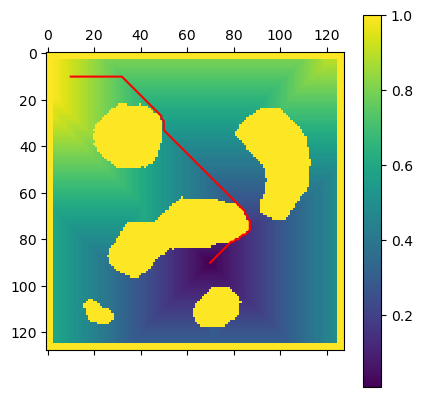

In [16]:
def find_the_path(attraction_map, start, goal):
    """
    Given an attraction function and a start position, this function returns the minimum path from start to goal.
    """
    # Define motions (8-point connectivity)
    motions = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # Initialize the path with the start position
    path = [start]
    current_point = path[-1]
    # Continue until the current point is not the goal
    while current_point:
        
        current_point = path[-1]
        shortest = current_point

        for m in motions:
            neighbor = (current_point[0] + m[0], current_point[1] + m[1])

            # Check if the neighbor is out of bounds
            if not isValid(neighbor, attraction_map):
                continue

            # Check if the neighbor point is closer to the goal
            if attraction_map[neighbor[0]][neighbor[1]] < attraction_map[shortest[0]][shortest[1]]:
                shortest = neighbor

        # Append the path with the shortest point
        if shortest != current_point:
            path.append(shortest)
            current_point = shortest
            new_queue = path[-1]
        else:
            current_point = []
        

    return path

#Run the Path function to find the minimum path from start_pos to goal_pos

min_path = find_the_path(wfp, start_pos, goal_pos)

#Print the Path
print("Minimum Path:", min_path)

# Plot the attraction map with the minimum path
plt.matshow(wfp_normalized)
plt.colorbar()
plt.plot([point[1] for point in min_path], [point[0] for point in min_path], color='red')
plt.show()

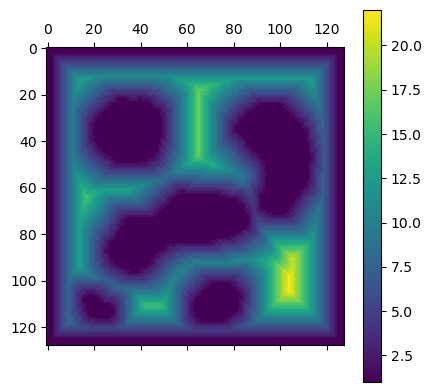

In [17]:
# Bushfire algorithm to compute distance
def bushfire_algorithm(map):

    # Initialize the distance map with zeros
    distance_map = np.zeros_like(map)
    queue = []

    # Initialize the queue with obstacle cells
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):

          #Check if the current cell in the map is an obstacle, indicated by a value of 1.
            if map[i][j] == 1:
                distance_map[i][j] = 1
                queue.append((i, j))

    while queue:
        cell = queue.pop(0)
        x, y = cell

        # Define the 8-connectivity neighbors
        neighbors = [(0,-1),(0,1),(-1,0),(1,0),(-1,-1),(-1,1),(1,-1),(1,1)]

        for neighbor in neighbors:
          dx, dy = neighbor
          nx, ny = x + dx, y + dy

          if isValid((nx, ny), map) and distance_map[nx][ny] == 0:
            distance_map[nx][ny] = distance_map[x][y] + 1
            queue.append((nx, ny))

    return distance_map

# Run the Bushfire algorithm
distance_map = bushfire_algorithm(grid_map)


# Plot the distance map
plt.matshow(distance_map)
plt.colorbar()
plt.show()

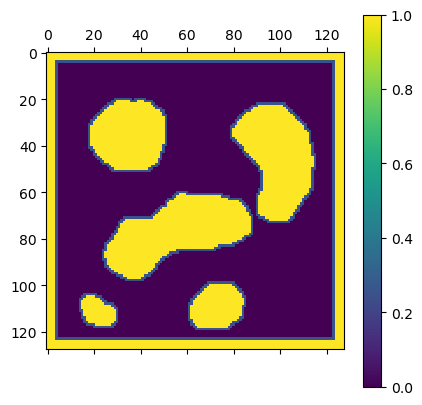

In [18]:
def repulsive_function(grid_map, distance_map, radius_repulsion):
    repulsion_map = np.zeros_like(distance_map)  # Initialize repulsion map with zeros

    for i in range(distance_map.shape[0]):
        for j in range(distance_map.shape[1]):
            D = distance_map[i][j]
            Q = radius_repulsion

            if D == 1:
                repulsion_value = 1
            elif D <= Q:
                repulsion_value = 1/4 * ((D - Q) ** 2)
            else:
                repulsion_value = 0

            repulsion_map[i][j] = repulsion_value

    return repulsion_map

# Example usage

radius_repulsion = 4  # Set the desired radius of repulsion
repulsion_map = repulsive_function(grid_map, distance_map, radius_repulsion)

# Performing Normalization using Min-Max Scaling to change the scale in the range of [0,1]

min_val = np.min(repulsion_map)
max_val = np.max(repulsion_map)

repulsion_normalized = (repulsion_map - min_val) / (max_val - min_val)

# Visualize the repulsion map
plt.matshow(repulsion_map)
plt.colorbar()
plt.show()


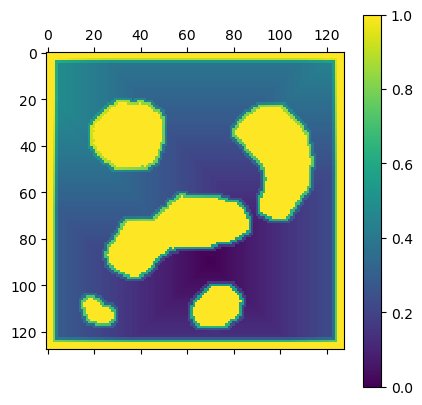

In [19]:
# Combine attraction and repulsion maps
combined_map = wfp_normalized + repulsion_normalized

# Perform Normalization using Min-Max Scaling to change the scale in the range of [0,1]
min_val = np.min(combined_map)
max_val = np.max(combined_map)
combination_normalized = (combined_map - min_val) / (max_val - min_val)

# Visualize the repulsion map
plt.matshow(combination_normalized)
plt.colorbar()
plt.show()

Combined Path: [(10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 30), (10, 31), (10, 32), (11, 33), (12, 34), (13, 35), (14, 36), (15, 37), (16, 38), (17, 39), (18, 40), (19, 41)]


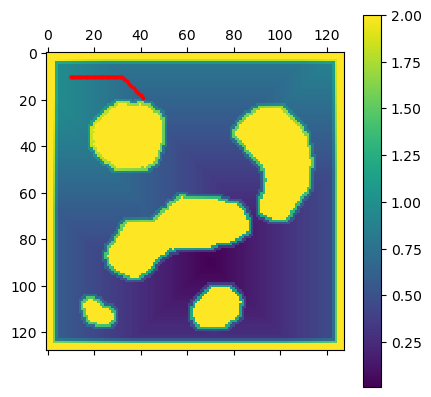

In [20]:
# Find the path using the combined potential function
combined_path = find_the_path(combined_map, start_pos, goal_pos)

# Print the path
print("Combined Path:", combined_path)

# Plot the path on the combined potential field
plt.matshow(combined_map)
plt.colorbar()
plt.plot([p[1] for p in combined_path], [p[0] for p in combined_path], color="red", marker='o', markersize=2)  # Added markers for better visibility
plt.show()